<a href="https://colab.research.google.com/github/MohakSinghania/Customer-Segmentation/blob/main/Customer_Segmentation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES

## DESCRIPTION

**numpy (imported as np):** NumPy is a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

**pandas (imported as pd):** Pandas is a library for data manipulation and analysis. It provides data structures such as DataFrames, which are highly efficient for working with structured data. Pandas offers a wide range of functions and methods to handle data, including reading and writing data from various file formats, data cleaning, filtering, merging, and aggregation.

**matplotlib.pyplot (imported as plt):** Matplotlib is a plotting library that provides a flexible and comprehensive set of tools for creating static, animated, and interactive visualizations in Python. The pyplot module is a collection of functions that provide a MATLAB-like interface for creating plots and visualizations.

**seaborn (imported as sns):** Seaborn is a statistical data visualization library built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn simplifies the process of creating common visualization types, such as histograms, bar plots, scatter plots, box plots, and more, with concise and elegant syntax.

**sklearn.cluster.KMeans:** This is a class from scikit-learn (imported as sklearn) which represents the K-Means clustering algorithm. Scikit-learn is a popular machine learning library that provides a wide range of algorithms and tools for tasks such as classification, regression, clustering, and dimensionality reduction. The KMeans class in scikit-learn implements the K-Means clustering algorithm, which partitions the input data into K clusters based on their similarity.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# LOADING DATASET

## Loading

In [6]:
# Loading From csv to pandas
customer_data = pd.read_csv('/content/Mall_Customers.csv')


## Exploratory Data Analysis

In [7]:
# Displaying first 5 rows in the customer_data dataframe
customer_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Displaying the number of rows and column
customer_data.shape

(200, 5)

In [17]:
# Describing the Dataset
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Displaying imformation about the customer_data dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [19]:
# Dropping the CustomerID attribute from dataset
customer_data.drop(['CustomerID'],axis = 1 , inplace = True)

In [20]:
# Displaying first 5 rows in the customer_data dataframe
customer_data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# PLOT THE GRAPHS

<ipython-input-22-8ebfb9b550c8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x] , bins = 20)
<ipython-input-22-8ebfb9b550c8>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_data[x] , bins = 20)
<ipython-input-22-8ebfb9b550c8>:7: UserWarning: 

`distplot` is a deprecat

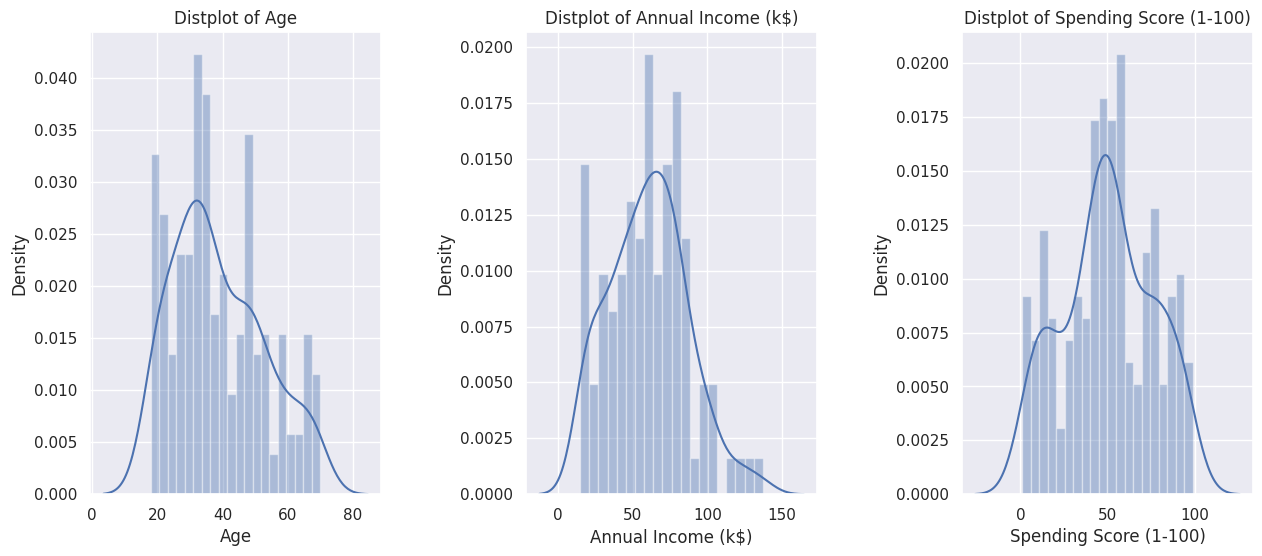

In [22]:
plt.figure(1 , figsize = (15,6))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1 ,3 , n)
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.distplot(customer_data[x] , bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

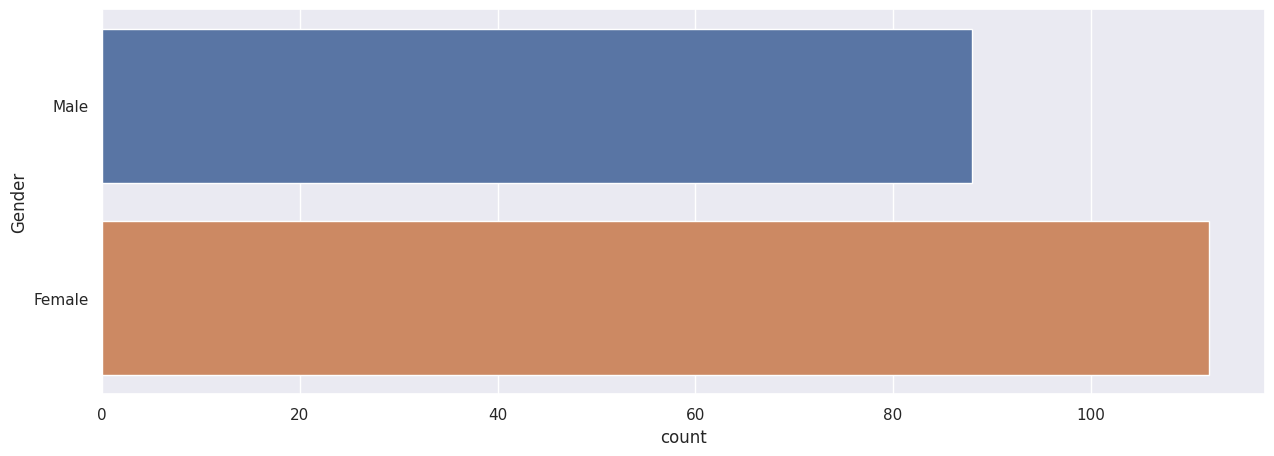

In [23]:
plt.figure(figsize = (15,5))
sns.countplot(y='Gender' , data = customer_data)
plt.show()

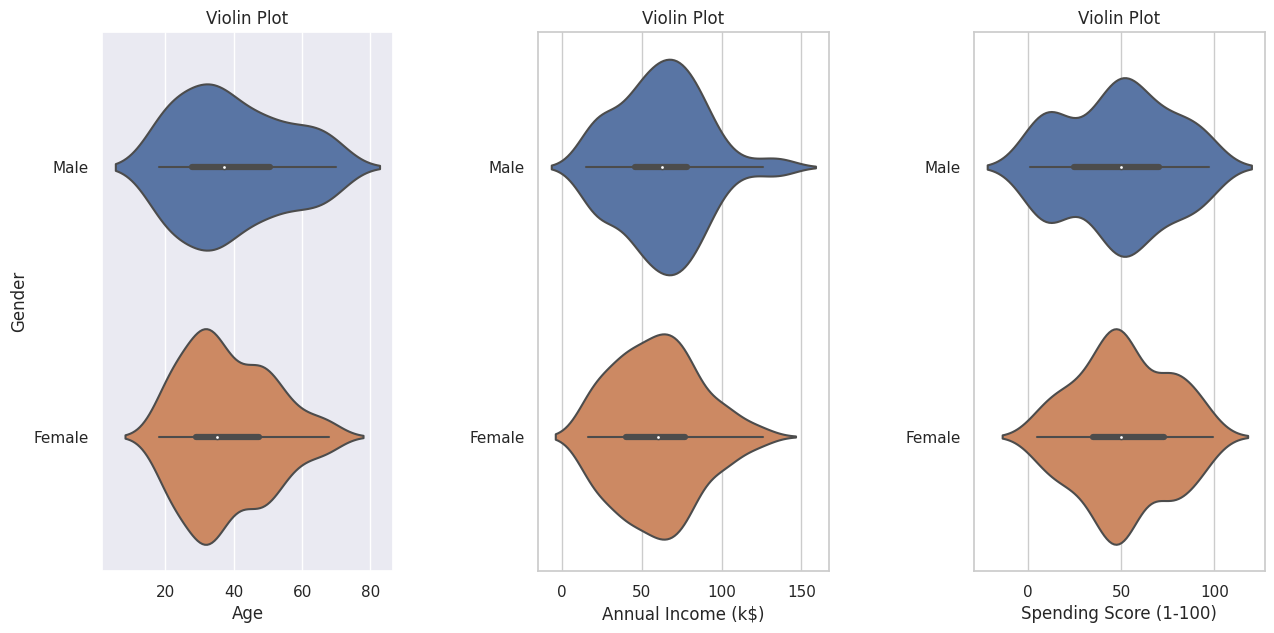

In [28]:
plt.figure(1 , figsize = (15,7))
n = 0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1 , 3 , n)
  sns.set(style = "whitegrid")
  plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
  sns.violinplot(x = cols , y = 'Gender' , data = customer_data)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Violin Plot')
plt.show()

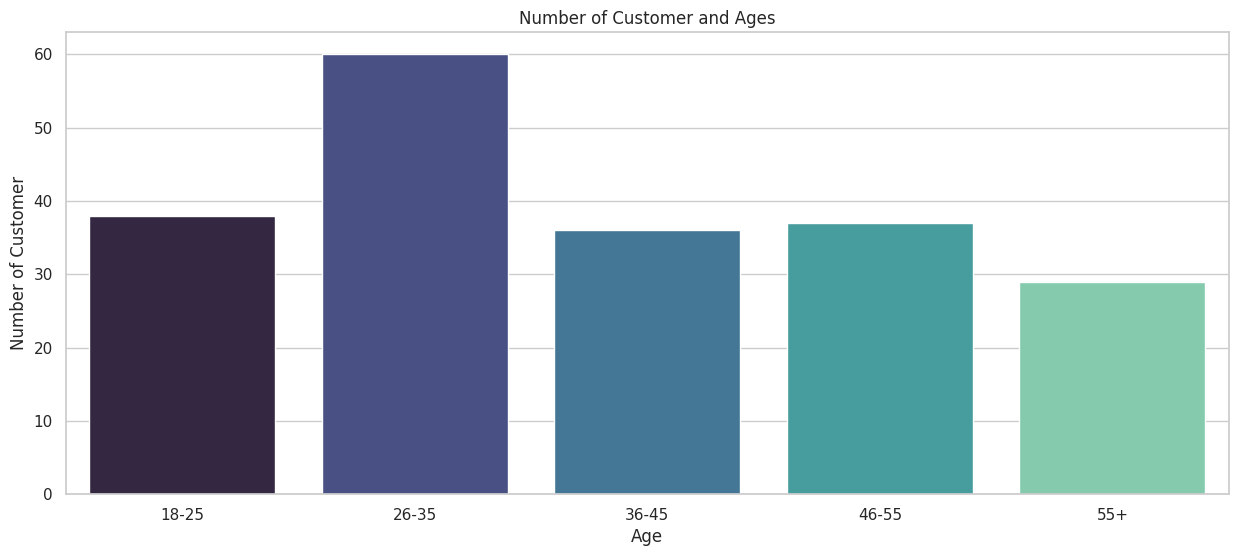

In [30]:
age_18_25 = customer_data.Age[(customer_data.Age >= 18) & (customer_data.Age <= 25)]
age_26_35 = customer_data.Age[(customer_data.Age >= 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data.Age >= 36) & (customer_data.Age <= 45)]
age_46_55 = customer_data.Age[(customer_data.Age >= 46) & (customer_data.Age <= 55)]
age_55above = customer_data[customer_data.Age >= 56]

agex = ['18-25' , '26-35' , '36-45' , '46-55' , '55+']
agey = [len(age_18_25.values) , len(age_26_35.values) , len(age_36_45.values) , len(age_46_55.values) , len(age_55above.values)]

plt.figure(figsize = (15,6))
sns.barplot(x = agex , y = agey , palette = "mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

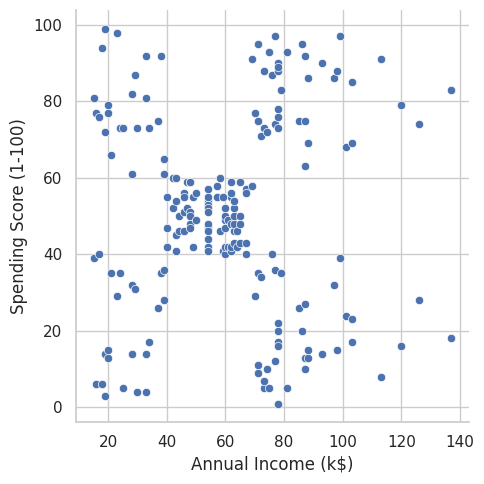

In [32]:
sns.relplot(x = "Annual Income (k$)" , y = "Spending Score (1-100)" , data = customer_data )

# FEATURE EXTRACTION


## Choosing the Annual Income and Spending Score Column

In [11]:
X = customer_data.iloc[:,[3,4]].values

In [12]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Choosing the number of clusters

### WCSS -> Within Cluster Sum of Squares

In [13]:
# Finding wcss value for different number of clusters

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

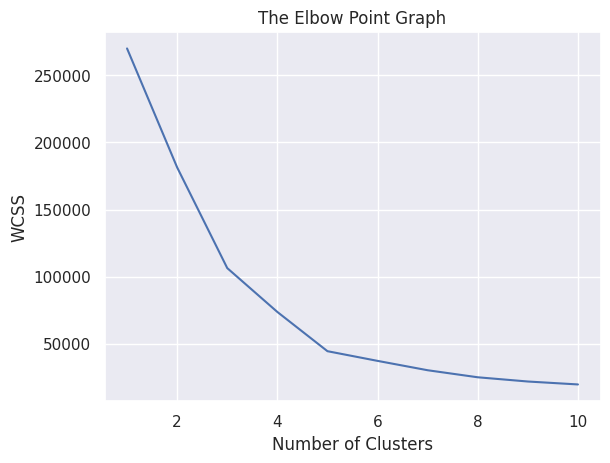

In [14]:
# Plotting an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

OPTIMUM NUMBER OF CLUSTERS = 5

# TRAINING THE MODEL

In [15]:
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state = 0)

#return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [33]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


# VISUALISING ALL THE CLUSTER

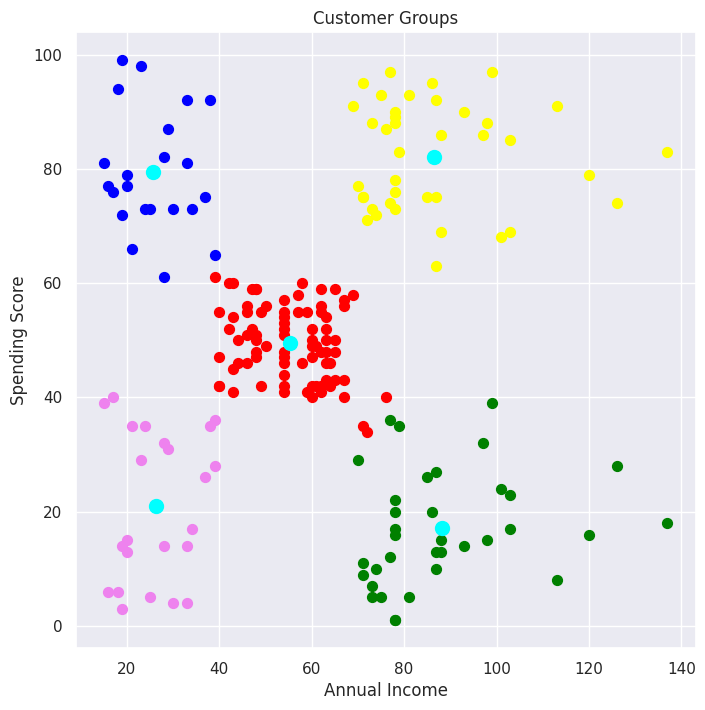

In [16]:
# Plotting all the cluster and their centroids

plt.figure(figsize = (8,8))
plt.scatter(X[Y==0,0] , X[Y==0,1] , s = 50 , c = 'green' , label = 'CLUSTER 1')
plt.scatter(X[Y==1,0] , X[Y==1,1] , s = 50 , c = 'red' , label = 'CLUSTER 2')
plt.scatter(X[Y==2,0] , X[Y==2,1] , s = 50 , c = 'yellow' , label = 'CLUSTER 3')
plt.scatter(X[Y==3,0] , X[Y==3,1] , s = 50 , c = 'blue' , label = 'CLUSTER 4')
plt.scatter(X[Y==4,0] , X[Y==4,1] , s = 50 , c = 'violet' , label = 'CLUSTER 5')

# Plotting the centroids

plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s = 100 , c= 'cyan' , label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()